In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BSESN.csv to BSESN.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("/content/BSESN.csv")

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,26116.519531,26116.519531,25596.570313,25623.349609,25623.349609,9100.0
1,2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300.0
2,2016-01-06,25628.230469,25632.570313,25357.699219,25406.330078,25406.330078,13400.0
3,2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800.0
4,2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900.0


In [ ]:
dataset.shape

(1234, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1234 non-null   object 
 1   Open       1230 non-null   float64
 2   High       1230 non-null   float64
 3   Low        1230 non-null   float64
 4   Close      1230 non-null   float64
 5   Adj Close  1230 non-null   float64
 6   Volume     1230 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1.230000e+03
mean,33847.403824,34006.243224,33610.164258,33803.231653,33803.231653,2.735734e+05
std,5266.520915,5277.348031,5234.656053,5259.217436,5259.217436,2.122895e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,0.000000e+00
25%,29361.417481,29514.447754,29208.930176,29400.961914,29400.961914,1.060000e+04
50%,34403.906250,34528.044922,34125.755860,34323.654297,34323.654297,1.440000e+04
75%,37993.417969,38162.420899,37736.923828,37928.289062,37928.289062,1.987500e+04
max,47789.031250,47980.359375,47771.148438,47868.980469,47868.980469,3.181510e+07


In [ ]:
dataset.isnull().any()

Date         False
Open          True
High          True
Low           True
Close         True
Adj Close     True
Volume        True
dtype: bool

In [ ]:
dataset.dropna(inplace=True)
dataset.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

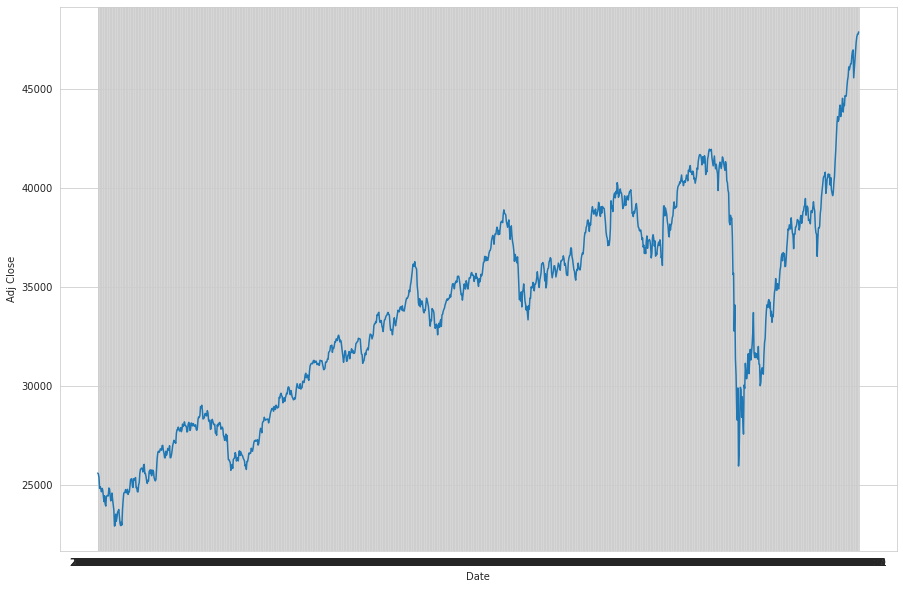

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.lineplot(x=dataset['Date'],y=dataset['Adj Close'],data=dataset)

In [ ]:
import itertools
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


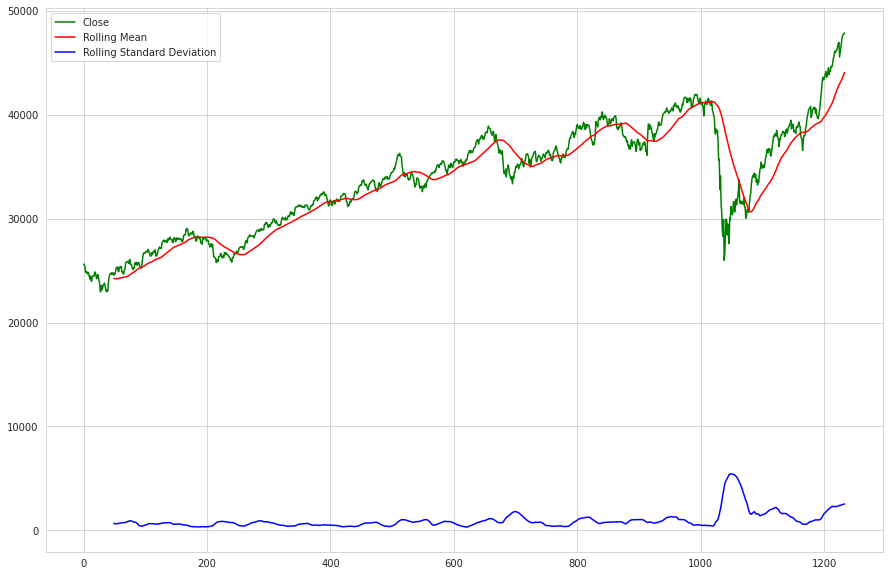

In [ ]:
Close = dataset['Adj Close']
ma = Close.rolling(window = 50).mean()
std = Close.rolling(window = 50).std()

plt.figure(figsize=(15,10))
dataset['Adj Close'].plot(color = 'g', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(color = 'b',label = 'Rolling Standard Deviation')
plt.legend()

In [ ]:
train = dataset[:1000]
test = dataset[1000:]

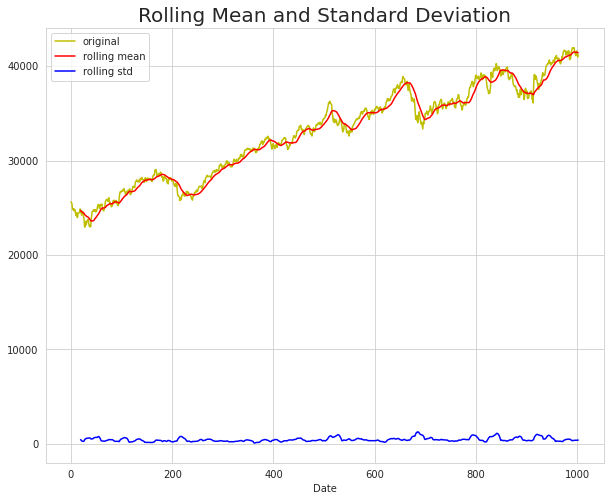

Results of dickey fuller test
ADF Test Statistic : -0.7250987142960784
p-value : 0.8401408600545291
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:

def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = timeseries.rolling(20).mean()
  rolstd = timeseries.rolling(20).std()

  #Plot rolling statistics:
  plt.figure(figsize = (10,8))
  plt.plot(timeseries, color = 'y', label = 'original')
  plt.plot(rolmean, color = 'r', label = 'rolling mean')
  plt.plot(rolstd, color = 'b', label = 'rolling std')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Rolling Mean and Standard Deviation',  fontsize = 20)
  plt.show(block = False)
 
  print('Results of dickey fuller test')
  result = adfuller(timeseries, autolag = 'AIC')
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result, labels):
    print(label+' : '+str(value) )
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
  else:
    print("Weak evidence against null hypothesis, time series is non-stationary ")
test_stationarity(train['Close'])

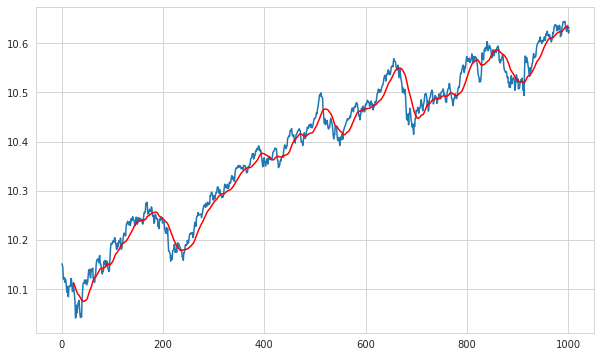

In [ ]:
train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

mav = train_log.rolling(24).mean() 
plt.figure(figsize = (10,6))
plt.plot(train_log) 
plt.plot(mav, color = 'red')

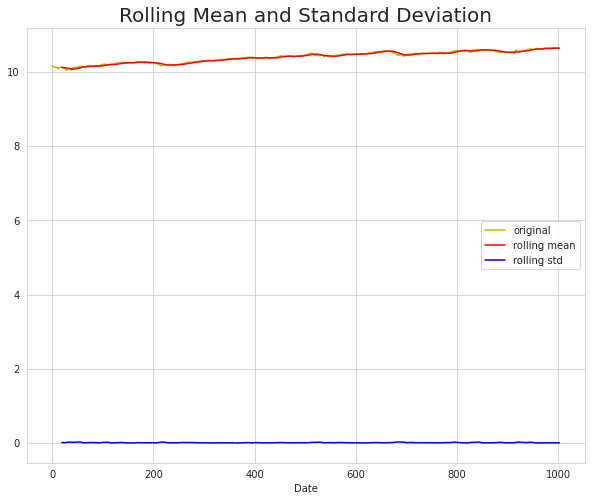

Results of dickey fuller test
ADF Test Statistic : -0.9006715466963748
p-value : 0.7877511872564454
#Lags Used : 1
Number of Observations Used : 998
Weak evidence against null hypothesis, time series is non-stationary 


In [ ]:
train_log.dropna(inplace = True)
test_log.dropna(inplace = True)

test_stationarity(train_log)

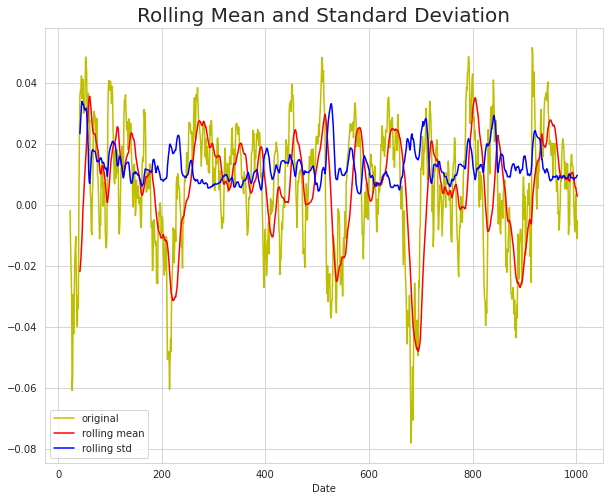

Results of dickey fuller test
ADF Test Statistic : -6.7848949764207624
p-value : 2.446293342910044e-09
#Lags Used : 2
Number of Observations Used : 974
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [ ]:
train_log_diff = train_log - mav
train_log_diff.dropna(inplace = True)

test_stationarity(train_log_diff)

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 9.0MB/s 
     |████████████████████████████████| 9.5MB 17.9MB/s 
     |████████████████████████████████| 2.1MB 52.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [ ]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])

In [ ]:
plt.plot(train_log, label='Train',color = 'b')
plt.plot(test_log, label='Test',color = 'r')
plt.plot(predictions, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [ ]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test_log,predictions))
print("RMSE : ", rms)

**Making Predictions Using LSTM**

In [ ]:
training_set = dataset[:1140].iloc[:,1:2].values

In [ ]:
training_set.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60,1140):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
## Reshaping the dataset
# refer keras documentation->recurrent layers
# no of stock prices, no of timesteps, no of indicators
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)

In [ ]:
X_train.shape

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
#Initializing the RNN
regressor = Sequential()
#Adding the first LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1))) #input_shape=last 2 of x_train
regressor.add(Dropout(0.2))

In [ ]:
#Adding a second LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True)) #units=no. of neurons in this layer
regressor.add(Dropout(0.2))

#Adding a third LSTM layer and some Droput regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [ ]:
#Adding a fourth LSTM layer and some Droput regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#Fitting the RNN to the training set
regressor.fit(x=X_train, y=y_train, batch_size=32 , epochs=50 )

In [ ]:
dataset_test = dataset[-20:-1]

In [ ]:
##Making the predictions and visualizing the results
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset['Open'],dataset['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values

In [ ]:
inputs.shape

In [ ]:
inputs = inputs.reshape(-1,1)
#In order to convert into 3D shape, it's needed
inputs.shape

In [ ]:
##Scaling the input
inputs = sc.transform(inputs)

#Convert into 3D format
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price.shape

In [ ]:
plt.plot(real_stock_price,color='green',label='real_stock_price')
plt.plot(predicted_stock_price,color='red',label='predicted_stock_price')
plt.xlabel('time')
plt.ylabel('stock price')
plt.title('Google stock price prediction')
plt.legend()

Textual Analysis

In [ ]:
dataset_news = pd.read_csv('india-news-headlines.csv')
dataset_news

In [ ]:
!pip install textblob

In [ ]:
import nltk
import re
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
import lightgbm

In [ ]:
dataset_news.columns = ['Date', 'Category', 'News']

In [ ]:
dataset_news.drop('Category',inplace=True,axis=1)

In [ ]:
dataset_news['Date'] = pd.to_datetime(dataset_news['Date'],format= '%Y%m%d')

In [ ]:
dataset_news

In [ ]:
dataset_news['News'] = dataset_news.groupby(['Date']).transform(lambda x : ' '.join(x))

In [ ]:
dataset_news = dataset_news.drop_duplicates()

In [ ]:
dataset_news

In [ ]:
dataset_news.reset_index(inplace = True, drop = True)
dataset_news

In [ ]:
dataset_news.News[1]

In [ ]:
!pip install WordCloud

In [ ]:
sentences = dataset_news['News'].tolist()
type(sentences)

In [ ]:
sentences_as_one_string = " ".join(sentences)
type(sentences_as_one_string)

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [ ]:
nltk.download('stopwords')

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords

In [ ]:
temp_list = []
for i in range(len(dataset_news['News'])):
    one_news = re.sub('[^a-zA-Z]',' ',dataset_news['News'][i])
    one_news = one_news.lower()
    one_news = one_news.split()
    one_news = [ps.stem(word) for word in one_news if not word in set(stopwords.words('english'))]
    one_news=' '.join(one_news)
    temp_list.append(one_news)

In [ ]:
temp_list[0][0:200]

In [ ]:
dataset_news['News'] = pd.Series(temp_list)
dataset_news

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
dataset_news['Subjectivity'] = dataset_news['News'].apply(getSubjectivity)
dataset_news['Polarity'] = dataset_news['News'].apply(getPolarity)
dataset_news

In [ ]:
!pip install vaderSentiment

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#Adding sentiment score to df_news
sia = SentimentIntensityAnalyzer()

dataset_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in dataset_news['News']]
dataset_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in dataset_news['News']]
dataset_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in dataset_news['News']]
dataset_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in dataset_news['News']]
dataset_news

**Combining textual and historical data together with Pandas merge fn**

In [ ]:
dataset_news['Date'] = pd.to_datetime(dataset_news['Date'])

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [ ]:
dataset_merge = pd.merge(dataset, dataset_news, how='inner', on='Date')

In [ ]:
df = dataset_merge[['Open','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))

In [ ]:
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

In [ ]:
X = new_df.drop('Open', axis=1)
y =new_df['Open']

In [ ]:
X.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
print(x_train.shape, x_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print("RandomForestRegressor: ",mean_squared_error(prediction,y_test))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print("AdaBoostRegressor: ",mean_squared_error(predictions, y_test))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [ ]:
print("DecisionTreeRegressor: ",mean_squared_error(predictions,y_test))

In [ ]:
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)
predictions = lgb.predict(x_test)

In [ ]:
print("LGBMRegressor: ",mean_squared_error(predictions,y_test))

In [ ]:
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

In [ ]:
print("XGBRegressor: ",mean_squared_error(predictions,y_test))


**We can observe that Random Forest Regressor performed better than others with lowest mean_squared_error**